<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,34.933271,31.110928,25.903335,36.358045,-0.536312,137.769267,138.279576,-0.510309
1,0.0,1.0,50.018153,23.160471,21.564752,64.248983,0.089714,169.082074,168.976761,0.105313
2,0.0,2.0,90.350025,60.105506,77.419889,41.520927,0.000139,279.396487,279.383526,0.012961
3,0.0,3.0,33.588602,72.997846,62.641446,86.091914,0.042265,265.362073,265.345735,0.016337
4,0.0,4.0,63.651308,60.724145,60.602858,78.327322,-0.254886,273.050747,273.317306,-0.266559
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.913576,57.549460,61.362201,21.532289,0.226123,241.583649,241.433698,0.149951
119996,999.0,116.0,75.976885,86.663229,33.256117,30.309599,0.399281,236.605111,236.247739,0.357372
119997,999.0,117.0,45.622171,27.237212,85.202726,78.242449,0.202470,246.507029,246.319084,0.187945
119998,999.0,118.0,65.188770,79.832326,31.645336,77.818330,0.244488,264.729251,264.458810,0.270441


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.933271  31.110928  25.903335  36.358045 -0.536312  137.769267   
      1.0    50.018153  23.160471  21.564752  64.248983  0.089714  169.082074   
      2.0    90.350025  60.105506  77.419889  41.520927  0.000139  279.396487   
      3.0    33.588602  72.997846  62.641446  86.091914  0.042265  265.362073   
      4.0    63.651308  60.724145  60.602858  78.327322 -0.254886  273.050747   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  90.913576  57.549460  61.362201  21.532289  0.226123  241.583649   
      116.0  75.976885  86.663229  33.256117  30.309599  0.399281  236.605111   
      117.0  45.622171  27.237212  85.202726  78.242449  0.202470  246.507029   
      118.0  65.188770  79.832326  31.645336  77.818330  0.244488  264.729251   
      119.0  70.822681  55.279777  55.599420  81.377100  0.232548  273.311526   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    138.279576 -0.510309  
      1.0    168.976761  0.105313  
      2.0    279.383526  0.012961  
      3.0    265.345735  0.016337  
      4.0    273.317306 -0.266559  
...                 ...       ...  
999.0 115.0  241.433698  0.149951  
      116.0  236.247739  0.357372  
      117.0  246.319084  0.187945  
      118.0  264.458810  0.270441  
      119.0  273.067054  0.244472  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.933271  31.110928  25.903335  36.358045 -0.536312  137.769267   
      1.0    50.018153  23.160471  21.564752  64.248983  0.089714  169.082074   
      2.0    90.350025  60.105506  77.419889  41.520927  0.000139  279.396487   
      3.0    33.588602  72.997846  62.641446  86.091914  0.042265  265.362073   
      4.0    63.651308  60.724145  60.602858  78.327322 -0.254886  273.050747   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  90.913576  57.549460  61.362201  21.532289  0.226123  241.583649   
      116.0  75.976885  86.663229  33.256117  30.309599  0.399281  236.605111   
      117.0  45.622171  27.237212  85.202726  78.242449  0.202470  246.507029   
      118.0  65.188770  79.832326  31.645336  77.818330  0.244488  264.729251   
      119.0  70.822681  55.279777  55.599420  81.377100  0.232548  273.311526   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    138.279576 -0.510309  
      1.0    168.976761  0.105313  
      2.0    279.383526  0.012961  
      3.0    265.345735  0.016337  
      4.0    273.317306 -0.266559  
...                 ...       ...  
999.0 115.0  241.433698  0.149951  
      116.0  236.247739  0.357372  
      117.0  246.319084  0.187945  
      118.0  264.458810  0.270441  
      119.0  273.067054  0.244472  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,34.933271,31.110928,25.903335,36.358045,-0.536312,137.769267,138.279576,-0.510309
1,0.0,1.0,50.018153,23.160471,21.564752,64.248983,0.089714,169.082074,168.976761,0.105313
2,0.0,2.0,90.350025,60.105506,77.419889,41.520927,0.000139,279.396487,279.383526,0.012961
3,0.0,3.0,33.588602,72.997846,62.641446,86.091914,0.042265,265.362073,265.345735,0.016337
4,0.0,4.0,63.651308,60.724145,60.602858,78.327322,-0.254886,273.050747,273.317306,-0.266559
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.913576,57.549460,61.362201,21.532289,0.226123,241.583649,241.433698,0.149951
119996,999.0,116.0,75.976885,86.663229,33.256117,30.309599,0.399281,236.605111,236.247739,0.357372
119997,999.0,117.0,45.622171,27.237212,85.202726,78.242449,0.202470,246.507029,246.319084,0.187945
119998,999.0,118.0,65.188770,79.832326,31.645336,77.818330,0.244488,264.729251,264.458810,0.270441


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.933271  31.110928  25.903335  36.358045 -0.536312  137.769267   
      1.0    50.018153  23.160471  21.564752  64.248983  0.089714  169.082074   
      2.0    90.350025  60.105506  77.419889  41.520927  0.000139  279.396487   
      3.0    33.588602  72.997846  62.641446  86.091914  0.042265  265.362073   
      4.0    63.651308  60.724145  60.602858  78.327322 -0.254886  273.050747   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  90.913576  57.549460  61.362201  21.532289  0.226123  241.583649   
      116.0  75.976885  86.663229  33.256117  30.309599  0.399281  236.605111   
      117.0  45.622171  27.237212  85.202726  78.242449  0.202470  246.507029   
      118.0  65.188770  79.832326  31.645336  77.818330  0.244488  264.729251   
      119.0  70.822681  55.279777  55.599420  81.377100  0.232548  273.311526   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    138.279576 -0.510309  
      1.0    168.976761  0.105313  
      2.0    279.383526  0.012961  
      3.0    265.345735  0.016337  
      4.0    273.317306 -0.266559  
...                 ...       ...  
999.0 115.0  241.433698  0.149951  
      116.0  236.247739  0.357372  
      117.0  246.319084  0.187945  
      118.0  264.458810  0.270441  
      119.0  273.067054  0.244472  

[120000 rows x 8 columns]

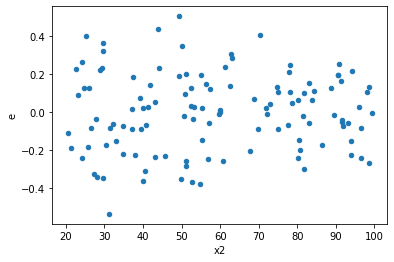

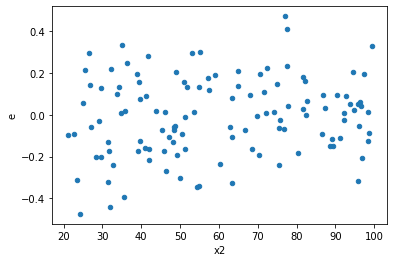

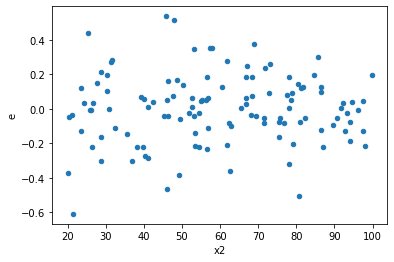

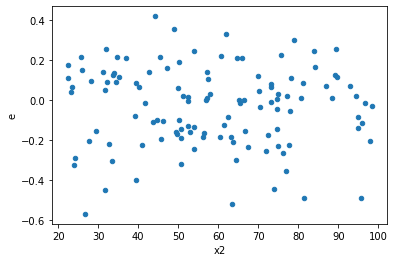

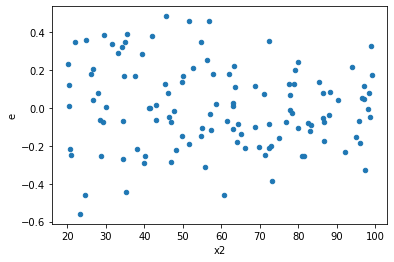

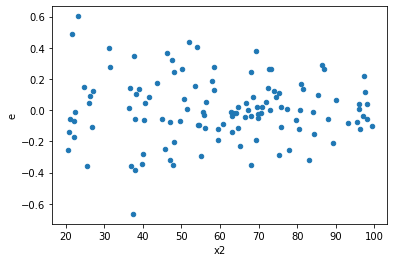

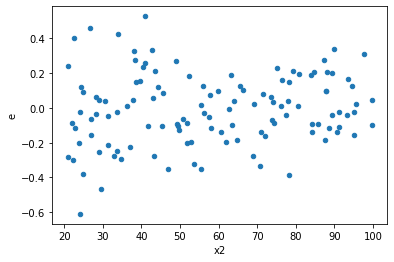

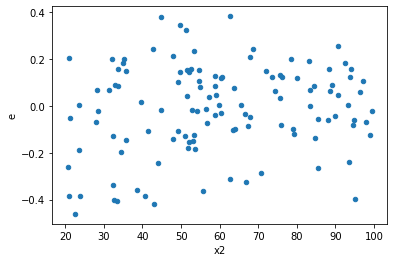

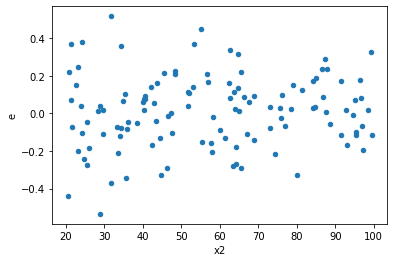

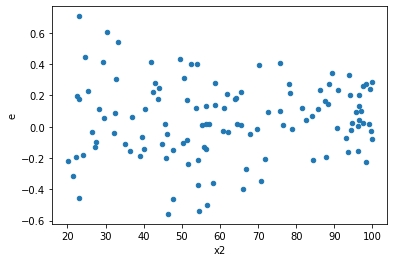

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,58.0,54.0,1.7775125398604947,1.7850327474540957,0.03064676792862922,0.03305616198989066,1.0786182107970566,0.7807224250017926,0.6096387874991037,0.3903612125008963,Reject005=1 : Homoscedasticity
7.0,65.0,47.0,2.1350486286319517,1.6483737060169947,0.032846901978953104,0.035071780979085,1.067734820214019,0.8212319345691939,0.5893840327154031,0.4106159672845969,Reject005=1 : Homoscedasticity
10.0,61.0,51.0,2.5883492858525026,2.3428434872382526,0.04243195550577873,0.04593810759290692,1.0826299906600036,0.7747545575694854,0.6126227212152573,0.3873772787847427,Reject005=1 : Homoscedasticity
11.0,67.0,45.0,2.0321815654963635,2.515594756181774,0.030331068141736767,0.05590210569292831,1.843064195157861,0.03106391366103267,0.9844680431694837,0.015531956830516336,Reject005=0 : Heteroscedasticity
12.0,49.0,63.0,1.713457429878075,3.3828808211504486,0.03496851897710357,0.053696520970642043,1.5355674916001179,0.10860581994604401,0.945697090026978,0.05430290997302201,Reject005=1 : Homoscedasticity
14.0,52.0,60.0,1.7349085411738727,2.041223439701399,0.03336362579180525,0.03402039066168998,1.0196850568335425,0.9371593189759557,0.5314203405120221,0.46857965948797786,Reject005=1 : Homoscedasticity
16.0,57.0,55.0,2.596813216503987,3.1658441300549742,0.04555812660533311,0.05756080236463589,1.263458501340082,0.3855155982115217,0.8072422008942391,0.19275779910576085,Reject005=1 : Homoscedasticity
19.0,71.0,41.0,2.7739136638223183,2.079873927013418,0.039069206532708706,0.05072863236618093,1.2984300647035398,0.3679465091159375,0.8160267454420312,0.18397325455796876,Reject005=1 : Homoscedasticity
20.0,58.0,54.0,1.8466814747510403,2.554103297913373,0.03183933577156966,0.04729820922061802,1.485527510999525,0.14375463887327022,0.9281226805633649,0.07187731943663511,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,71.0,41.0,3.353372334333506,1.4146311955628876,0.0472305962582184,0.03450319989177775,0.7305264516065471,0.24390602116953583,Reject005=1 : Homoscedasticity
1.0,58.0,54.0,1.7775125398604947,1.7850327474540957,0.03064676792862922,0.03305616198989066,1.0786182107970566,0.7807224250017926,Reject005=1 : Homoscedasticity
2.0,56.0,56.0,2.4230465480233705,1.9844654784621556,0.04326868835756019,0.03543688354396706,0.8189960197343328,0.4573739333943426,Reject005=1 : Homoscedasticity
3.0,63.0,49.0,2.551501792516064,1.8512807041735138,0.040500028452635936,0.037781238860683956,0.9328694399528248,0.7883827199373955,Reject005=1 : Homoscedasticity
4.0,50.0,62.0,2.3823018237484854,2.754133813025179,0.047646036474969705,0.044421513113309344,0.9323233662184193,0.8029376734903636,Reject005=1 : Homoscedasticity
5.0,52.0,60.0,2.478137343609825,2.2326164825444,0.04765648737711202,0.037210274709073336,0.780801875191169,0.36330287441543757,Reject005=1 : Homoscedasticity
6.0,58.0,54.0,2.907689639490582,1.8237433604194269,0.050132579991216925,0.03377302519295235,0.6736741894965166,0.140923797054584,Reject005=1 : Homoscedasticity
7.0,65.0,47.0,2.1350486286319517,1.6483737060169947,0.032846901978953104,0.035071780979085,1.067734820214019,0.8212319345691939,Reject005=1 : Homoscedasticity
8.0,69.0,43.0,2.664373203900848,1.2381541483420095,0.03861410440436012,0.028794282519581618,0.7456933927057572,0.27363800220884404,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      778
Reject005=0 : Heteroscedasticity    222
Name: Result_test, dtype: int64